# Gradient Boosting

[Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is a **boosting** ensemble method, as opposed to random forest which is a **bagging** ensemble model. Another well-known boosting ensemble method is AdaBoost (Adaptive Bossting). 

## Basics

Similar to bagging, boosting typically combine decision trees as weak/simple learners to achieve a strong learner, known as tree boosting or boosted trees. However, different from bagging like random forests, each tree in boosting is **dependent** on prior trees. 

<img src='../figs/13_GradientBoost.png' width = '600'>

Models are fit using a differentiable loss function and gradient descent algorithm on the **function space**. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit:

1. learn a constant estimator $f_0$ on the data as the initial tree boosting $F_0 = f_0$.

2. Repeat for $m = 1, 2, \dots, M$:  

   * predict using current ensemble model $F_{m-1}$.

   * calculate some residual error of $F_{m-1}$ for each training sample, **take the residual as the target/label to fit a new tree $T_M$**.   
   
   * update the boosted trees $F_m = F_{m-1} + \gamma T_m$, for some proper $\gamma\in(0,1)$ resembling the **learning rate** in gradient descent.
   
The algorithm resembles gradient descent on the **function space**, justifying the name 'gradient boosting'. This is different from conventional gradient methods which operate on **parameter space**.

### The Algorithm

   
The gradient boosting algorithm is described as follows:
   
<img src='../figs/13_GB_Algo.png'>

The algorithm works in both regression and classification settings:

- For regression with squared loss: 

$$L(y, F(x)) = \frac{1}{2}(y - F(x))^2,$$ 

the pseudo residuals are 

$$
r_i = - \frac{\partial L (y_i, F(x_i))}{\partial F} = y_i - F(x_i), \; i = 1,\dots, n
$$

- For binary classification with cross-entropy loss:

$$
L(y, F(x)) = -y\log p(x) - (1-y)\log(1-p(x)) =  - y F(x) + \log (1 + e^{F(x)}),
$$

where $F(x) = \log \frac{p(x)}{1-p(x)}$ is the logit or log-odds,
the pseudo residuals are 

$$
r_i = - \frac{\partial L (y_i, F(x_i))}{\partial F} = y_i - \frac{1}{1 + e^{-F(x_i)}}, \; i = 1,\dots, n
$$

and the sigmoind function $\frac{1}{1 + e^{-F(x_i)}} = p(x_i)$ represents the predicted probability.

Essentially, the algorithm iteratively updates a decision function $F(x)$ until 

$$
\frac{\partial L (y_i, F(x_i))}{\partial F} = 0, \; \mbox{for} \; i = 1,\dots, n
$$


#### Early stopping 

Unlike bagging, it is possible for boosting to overfit, by adding too many classifiers. The solution
that is normally used practice is a procedure called early stopping. The idea is to monitor the errors on the
testing set, which will generally decrease along with training errors as the algorithm proceeds. However, at some point, if the testing error will begin to get noticeably worse, we revert the classifier to
the status that gave the best test error, and discard any subsequent changes, i.e., additional weak
classifiers.

## XGBoost

[XGBoost](https://en.wikipedia.org/wiki/XGBoost) (eXtreme Gradient Boosting) is a scalable open-source machine learning system under the Gradient Boosting framework. The impact of the system has been widely recognized in a number of machine learning and data mining challenges. It became well known in the machine learning competition circles after its use in the winning solution of the Higgs Machine Learning Challenge. Many of the winning solutions in Kaggle competitions have used XGBoost to train models. 

**XGBoost and ``sklearn``'s GradientBoosting, are fundamentally the same as they are both gradient boosting implementations**.
However, there are very significant differences under the hood in a practical sense. By using several tricks, **XGBoost is a lot faster than ``sklearn``.** 


Install XGBoost: ``conda install -c conda-forge xgboost``

## Example 1: California Housing Prediction

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
print(housing.keys())
print()
print(housing.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

(20640, 8)


In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
import pandas as pd

data = pd.DataFrame(housing.data)
data.columns = housing.feature_names

In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
data['PRICE'] = housing.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


Import libraries including ``xgboost``:

In [10]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [68]:
X, y = np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1])

#### Train-test splitting

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Instantiate an XGBoost regressor object by calling the ``XGBRegressor()`` class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the ``XGBClassifier()`` class.

In [102]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, n_estimators = 500)
# colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
# learning_rate: 'learning rate' for gradient boosting. Range is [0,1]

In [103]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [104]:
print("RMSE: %f" % np.sqrt(mean_squared_error(y_test, preds)))

RMSE: 0.469687


The RMSE for the price prediction came out to be around 1.024 per $100,000.


### Tuning hyperparameters with grid search

XGBoost can be combined with ``GridSearchCV`` to choose good combination of parameters. Check out https://xgboost.readthedocs.io/en/latest/parameter.html for parameter descriptions.

In [125]:
params = {
    "subsample":[0.75, 0.9],
    "colsample_bytree":[0.5, 0.75, 0.9],
    "max_depth":[2, 5],
    "learning_rate":[0.1, 0.01]
}

In [126]:
xg_reg = xgb.XGBRegressor(n_estimators=500)

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid = GridSearchCV(estimator = xg_reg, param_grid = params, cv = 5, refit = True)

In [129]:
grid.fit(X_train, y_train, verbose = 3)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...ne, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=500,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 0.9],
                         'learning_rate': [0.1, 0.01], 'max_depth': [2, 5],
                         'subsample': [0.75, 0.9]})

In [130]:
print(grid.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'subsample': 0.9}


In [131]:
preds = grid.predict(X_test)
print("RMSE: %f" % np.sqrt(mean_squared_error(y_test, preds)))

RMSE: 0.340523


## Example 2: Heart Disease Prediction

* Features:
   1. age
   2. sex: 1 = male, 0 = female
   3. cp: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptotic
   4. trestbps: resting blood pressure
   5. chol: serum cholestoral in mg/dl
   6. fbs: fasting blood sugar > 120 mg/dl, 1 = true, 0 = false
   7. restecg: resting electrocardiographic results, 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy
   8. thalach: maximum heart rate achieved
   9. exang: exercise induced angina, 1 = yes, 0 = no
   10. oldpeak: ST depression induced by exercise relative to rest
   11. slop: peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
   12. ca: number of major vessels (0-3) colored by flourosopy
   13. thal: displays the thalassemia

* Target: diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not: 0 = absence, 1 = present.

In [116]:
import pandas as pd
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [119]:
# Split data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Train test split

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Instantiate a ``XGBClassifier``

In [121]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=20)

### GridSearchCV

In [122]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

Create a dictionary that describes the parameters we want to try and fit the ``grid`` object on training data

In [123]:
param_grid = {'n_estimators': [100, 400, 800],
             'learning_rate': [0.005, 0.01, 0.05],
             'colsample_bytree': [0.3, 0.5, 0.7],
              'max_depth': [3, 4, 5] 
             }
grid = GridSearchCV(model, param_grid, cv=5, verbose = 2, refit = True)

In [124]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.005, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END colsample_b

[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=800; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=100; total tim

[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=4, n_estimators=800; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=4, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=4, n_estimators=800; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.005, max_depth=5, n_estimators=400;

[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=800; total tim

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=400; total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=20, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.005, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 400, 800]},
             verbose=2)

Inspect the best parameters found by ``GridSearchCV`` in the ``best_params_`` attribute:

In [15]:
grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.005,
 'max_depth': 4,
 'n_estimators': 800}

In [16]:
grid.best_score_

0.8415458937198068

### Evaluation

Check out test accuracy:

In [17]:
y_preds = grid.predict(X_test)
accuracy_score(y_test, y_preds)

0.8421052631578947

Visualize the ``confusion matrix`` using ``heatmap``:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

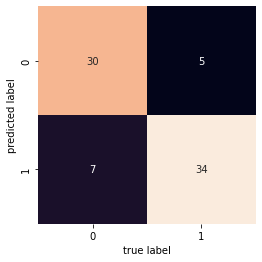

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');